# 📅 Día 3 – Datos meteorológicos y geofísicos

## Objetivo del día
Aprender a trabajar con **datos reales** en Meteorología y Geofísica:
- Leer y manipular datos multidimensionales (rejilla y series temporales).
- Calcular **estadísticas climatológicas y anomalías**.
- Procesar y analizar **señales sísmicas**.
- Representar resultados en **gráficas y mapas**.

---

### 🌀 Parte 1 – Meteorología
- Introducción a archivos **NetCDF** y librería **xarray**.
- Manejo de variables espaciales y temporales (tiempo, lat, lon).
- Cálculo de **climatologías** (promedio mensual/anual).
- Cálculo de **anomalías** respecto a la climatología.
- Visualización en **mapas con Cartopy**.

**Ejemplo aplicado**:  
Datos de reanálisis ERA5 (temperatura a 2 m).  
1. Calcular la climatología mensual en la Península Ibérica.  
2. Calcular anomalías de un mes respecto al promedio histórico.  
3. Representar los resultados en mapas.

---

### 🌍 Parte 2 – Geofísica
- Introducción a formatos de datos sísmicos (**MiniSEED**) y librería **ObsPy**.
- Procesamiento de señales: filtrado y preprocesado.
- Cálculo de espectros y espectrogramas.
- Representación de **eventos sísmicos en mapas**.

**Ejemplo aplicado**:  
Datos de un sismo en formato MiniSEED.  
1. Cargar y visualizar el sismograma.  
2. Aplicar filtros paso alto/bajo.  
3. Calcular espectro y espectrograma.  
4. Localizar epicentro en un mapa simple.

---

✅ Al final del día, los estudiantes habrán trabajado con **datasets multidimensionales de meteorología** y con **señales sísmicas en geofísica**, viendo paralelismos entre ambos campos.

## Parte 1 – Meteorología con xarray y cartopy

Librerías clave
- xarray → para trabajar con archivos NetCDF (ERA5, CMIP6, etc.).
- cartopy → para mapas.
- matplotlib → para visualizaciones.

Ejemplo: Climatología y anomalías con ERA5

## 📂 Estructura en xarray: Dataset y DataArray

Un archivo **NetCDF** se carga en `xarray` como un **Dataset**, que contiene varias variables (`DataArray`).

```text
Dataset
 ├── coords   → coordenadas
 │     ├── time        (ej. 2020-01-01 … 2020-12-31)
 │     ├── latitude    (ej. 45.0 … 35.0)
 │     └── longitude   (ej. -10.0 … 5.0)
 │
 ├── data_vars → variables principales
 │     ├── t2m   (time, latitude, longitude)
 │     ├── u10   (time, latitude, longitude)
 │     └── v10   (time, latitude, longitude)
 │
 └── attrs   → metadatos globales
        ├── title: "ERA5 reanalysis"
        ├── institution: "ECMWF"
        └── conventions: "CF-1.7"

In [1]:
import xarray as xr

# Abrir un NetCDF de ejemplo
ds = xr.open_dataset("data/era5_example.nc")

# Ver el contenido
print(ds)


<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 366, latitude: 41, longitude: 61)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 3kB 2020-01-01T12:00:00 ... 2020-...
  * latitude    (latitude) float64 328B 45.0 44.75 44.5 ... 35.5 35.25 35.0
  * longitude   (longitude) float64 488B -10.0 -9.75 -9.5 -9.25 ... 4.5 4.75 5.0
    expver      (valid_time) <U4 6kB ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-24T08:44 GRIB to CDM+CF via cfgrib-0.9.1...


In [ ]:
# valid_time → tiempo de validez (predicción), pero nosotros queremos que se llame "time" 

ds = ds.rename({"valid_time": "time"})
print(ds)


<xarray.Dataset> Size: 4MB
Dimensions:    (time: 366, latitude: 41, longitude: 61)
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 3kB 2020-01-01T12:00:00 ... 2020-12-31T1...
  * latitude   (latitude) float64 328B 45.0 44.75 44.5 44.25 ... 35.5 35.25 35.0
  * longitude  (longitude) float64 488B -10.0 -9.75 -9.5 -9.25 ... 4.5 4.75 5.0
    expver     (time) <U4 6kB ...
Data variables:
    t2m        (time, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-24T08:44 GRIB to CDM+CF via cfgrib-0.9.1...


In [4]:
# Seleccionar una variable
t2m = ds["t2m"]

# Acceso a un punto (lat, lon, tiempo)
print(t2m.sel(latitude=40, longitude=-3, method="nearest").isel(time=0).values)

281.35303


In [5]:
t2m = t2m - 273.15   # convertir a °C si está en Kelvin
print(t2m.sel(latitude=40, longitude=-3, method="nearest").isel(time=0).values)

8.203033


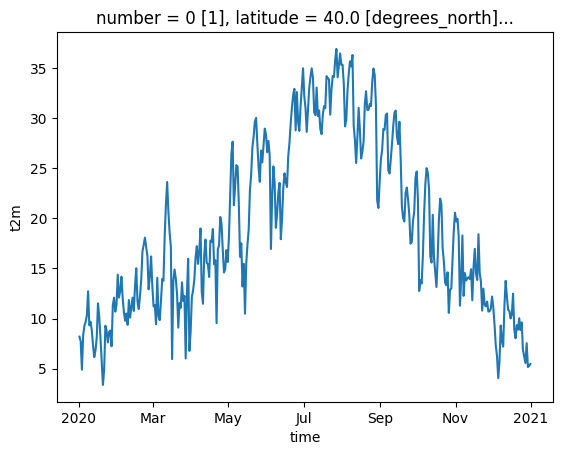

In [6]:
# Media temporal
media = t2m.mean("time")

# Media espacial en un punto
serie = t2m.sel(latitude=40, longitude=-3, method="nearest")

# Graficar serie temporal
serie.plot()

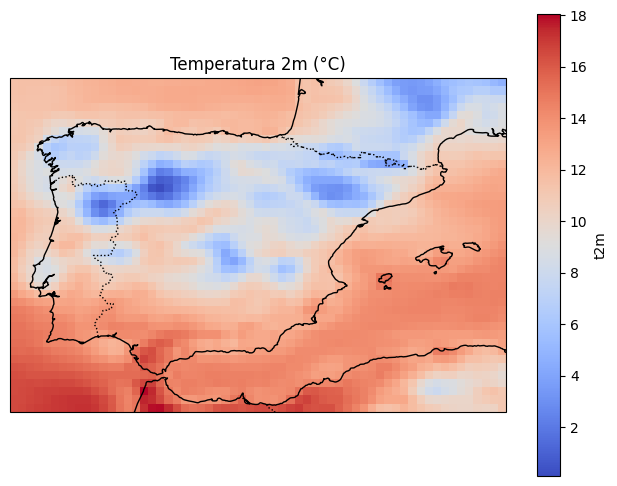

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Seleccionar un campo (primer día)
campo = t2m.isel(time=0)

fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(8,6))
campo.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="coolwarm")
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.set_title("Temperatura 2m (°C)")
plt.show()

## 📂 Estructura de un archivo MiniSEED

Un archivo **MiniSEED** es un formato estándar para almacenar datos sísmicos en forma de **series temporales**.  
Es una versión compacta del formato SEED, muy usada en geofísica.

### Contenido principal
- **Trazas (Traces)** → cada una representa una serie temporal (ej. una componente de una estación).  
- Cada traza tiene:
  - **Cabecera (header)** con metadatos.
  - **Datos** → valores de amplitud (normalmente enteros de 16/32 bits).

### 🔹 Información en la cabecera
- **Network** → código de la red sísmica (ej. `IU`, `GE`).  
- **Station** → nombre de la estación.  
- **Location** → código opcional (posición dentro de la estación).  
- **Channel** → componente (ej. `BHZ`, `BHN`, `BHE`).  
- **StartTime** → instante inicial de la traza.  
- **Sampling rate** → frecuencia de muestreo (Hz).  
- **Number of points** → número de muestras.

### 🔹 Organización
- Un fichero MiniSEED puede contener:
  - **Una sola traza** (muy habitual).
  - **Varias trazas** (ej. las 3 componentes de una estación: Z, N, E).
- ObsPy representa este contenido con:
  - `Stream` → colección de trazas.
  - `Trace` → cada señal individual con `stats` (metadatos) y `data` (numpy array).

### Ejemplo con ObsPy
```python
from obspy import read

st = read("data/sismo.mseed")
print(st)          # información del Stream
print(st[0].stats) # cabecera de la primera traza
print(st[0].data)  # numpy array con los datos

## 🗂️ Estructura en ObsPy: Stream y Trace

Un archivo **MiniSEED** se carga en ObsPy como un **Stream**, que es una colección de **Traces**.
```text
Stream
 ├── Trace 1
 │     ├── stats   → metadatos (dict-like)
 │     │     ├── network   (ej. "IU")
 │     │     ├── station   (ej. "ANMO")
 │     │     ├── channel   (ej. "BHZ")
 │     │     ├── starttime (ej. 2020-01-01T00:00:00)
 │     │     ├── sampling_rate (ej. 20.0 Hz)
 │     │     └── npts      (número de puntos)
 │     └── data    → array NumPy con la señal
 │
 ├── Trace 2
 │     ├── stats
 │     └── data
 │
 └── Trace N
        ├── stats
        └── data

In [11]:
from obspy import read

# Cargar un sismograma
st = read("data/sismo.mseed")
print(st)

1 Trace(s) in Stream:
IU.ANMO.00.BHZ | 2017-09-19T18:14:00.019536Z - 2017-09-19T18:43:59.969536Z | 20.0 Hz, 36000 samples


In [12]:
print(st[0].stats)

         network: IU
         station: ANMO
        location: 00
         channel: BHZ
       starttime: 2017-09-19T18:14:00.019536Z
         endtime: 2017-09-19T18:43:59.969536Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 36000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 152, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 77824})


In [13]:
print(st[0].data)

[-515628 -515617 -515600 ... -475727 -475963 -476249]


In [15]:
# Extraer la primera traza
tr = st[0]
print(tr)

IU.ANMO.00.BHZ | 2017-09-19T18:14:00.019536Z - 2017-09-19T18:43:59.969536Z | 20.0 Hz, 36000 samples


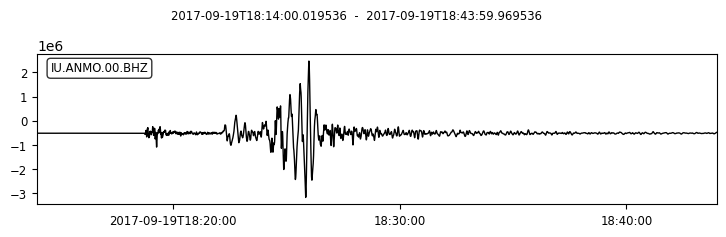

In [23]:
# Graficar sismograma
tr.plot(show=False)

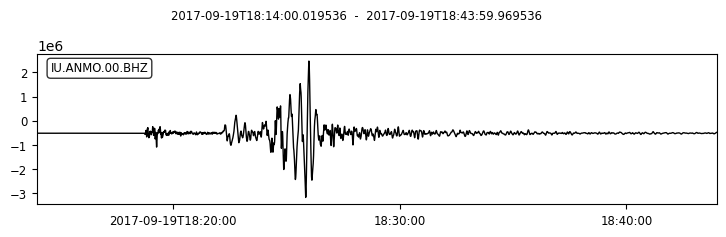

In [22]:
fig = tr.plot(show=True)  # no muestra directamente
plt.show()                 # lo muestras tú solo una vez

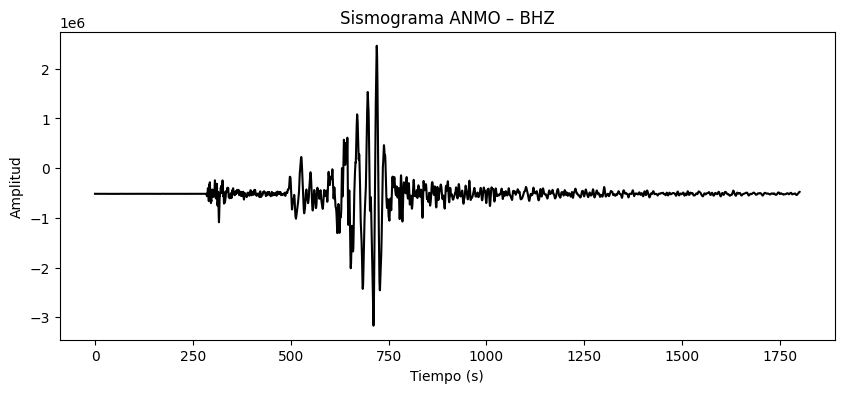

In [24]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(tr.stats.npts) / tr.stats.sampling_rate
plt.figure(figsize=(10,4))
plt.plot(t, tr.data, "k")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Sismograma {tr.stats.station} – {tr.stats.channel}")
plt.show()

Estación: ANMO
Frecuencia de muestreo: 20.0


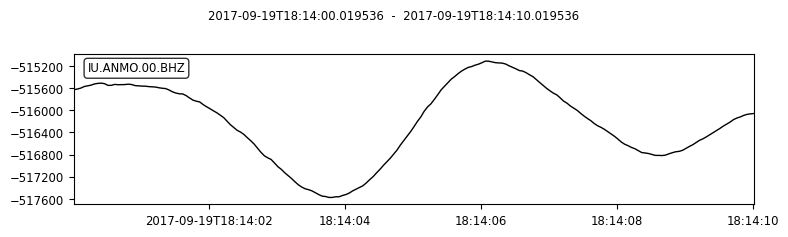

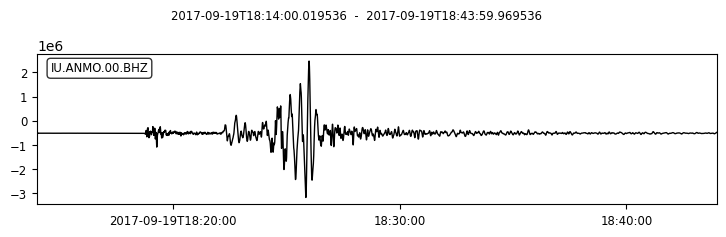

In [25]:
# Información de la traza
print("Estación:", tr.stats.station)
print("Frecuencia de muestreo:", tr.stats.sampling_rate)

# Recortar 10 segundos
tr_cut = tr.slice(starttime=tr.stats.starttime, endtime=tr.stats.starttime + 10)
tr_cut.plot()

# Filtrado básico
tr_filt = tr.copy()
tr_filt.filter("lowpass", freq=1.0)
tr_filt.plot(show=False)

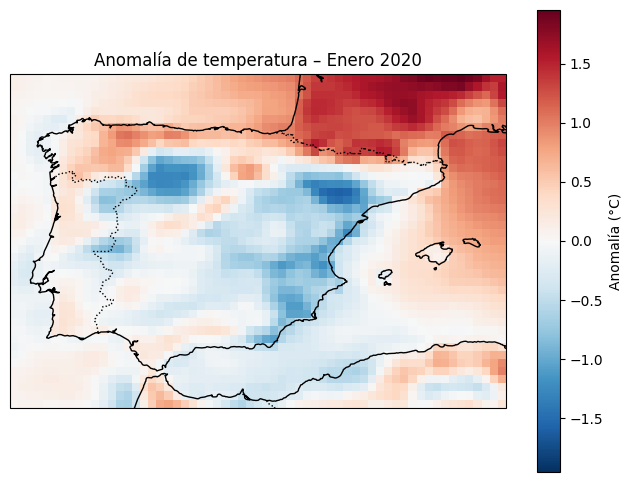

In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Abrir dataset NetCDF
#ds = xr.open_dataset("data/era5_example.nc")
ds = xr.open_dataset("data/era5_2016_2020.nc")


# Seleccionar variable temperatura a 2m
t2m = ds["t2m"] - 273.15   # convertir a °C si está en Kelvin
t2m = t2m.rename({'valid_time': 'time'}) 
t2m = t2m.squeeze(drop=True)  # elimina coords sobrantes como 'expver'

# Climatología mensual (media de todos los eneros, febreros, etc.)
clim = t2m.groupby("time.month").mean("time")

# Seleccionar un mes concreto (ejemplo: enero 2020)
t2m_2020_jan = t2m.sel(time="2020-01")

# Anomalía: diferencia entre enero 2020 y climatología de enero
anom = t2m_2020_jan.groupby("time.month") - clim

# Graficar anomalía en mapa
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(8,6))
anom.mean("time").plot(
    ax=ax, transform=ccrs.PlateCarree(),
    cmap="RdBu_r", cbar_kwargs={"label": "Anomalía (°C)"}
)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.set_title("Anomalía de temperatura – Enero 2020")
plt.show()

## 🌍 Parte 2 – Geofísica con obspy

Librerías clave
	•	obspy → para datos sísmicos (MiniSEED, SAC, etc.).
	•	scipy / numpy → para análisis de señales.
	•	matplotlib → para graficar sismogramas, espectros y espectrogramas.

Ejemplo: Procesar un sismo (MiniSEED)

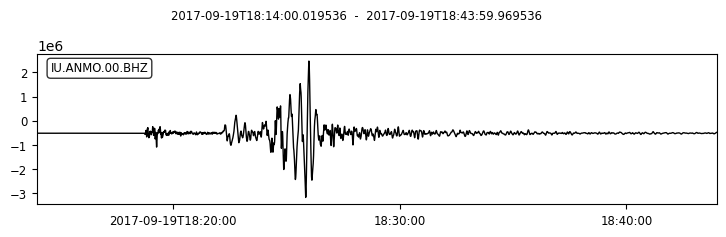

/Users/galeanojav/miniconda3/lib/python3.12/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (10.0) of bandpass is at or above Nyquist (10.0). Applying a high-pass instead.
  warnings.warn(msg)


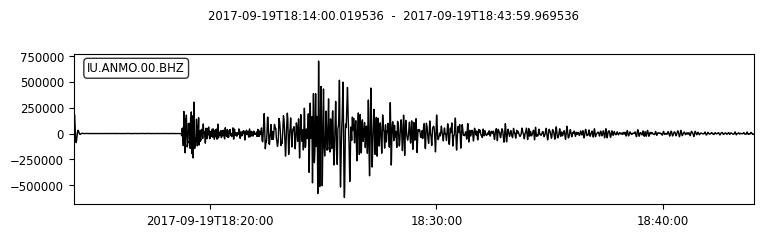

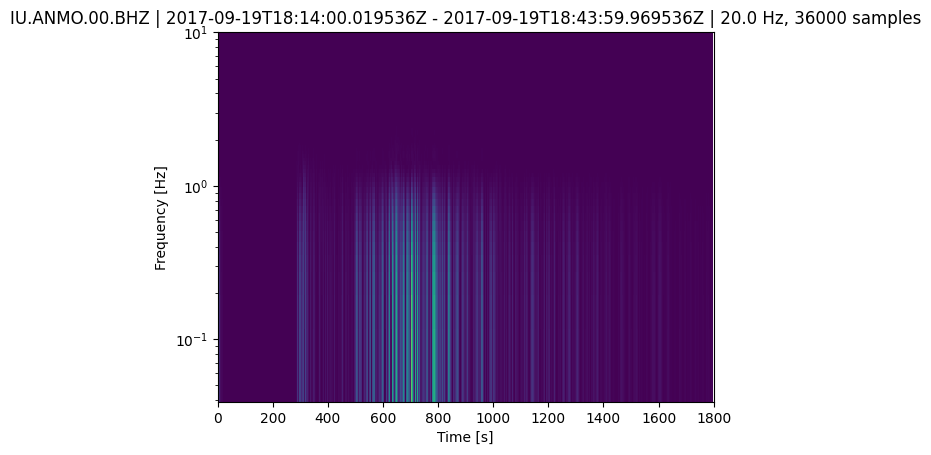

In [6]:
from obspy import read
import matplotlib.pyplot as plt

# Leer archivo MiniSEED
st = read("data/sismo.mseed")
tr = st[0]

# Mostrar trazado original
tr.plot()

# Aplicar filtros
tr_filt = tr.copy()
tr_filt.filter("bandpass", freqmin=0.1, freqmax=10.0)

# Graficar señal filtrada
tr_filt.plot()

# Espectrograma
tr_filt.spectrogram(log=True, wlen=2.0, cmap="viridis")